In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [3]:
print(f'Tensorflow version = {tf.__version__}')
print(f'Keras version = {keras.__version__}')

Tensorflow version = 2.12.0
Keras version = 2.12.0


In [4]:
# Sample Problem

np.random.seed(0) # pick the seed for reproducibility - change it to explore the effects of random variations

n = 100
X, Y = make_classification(n_samples = n, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0.05,class_sep=1.5)
X = X.astype(np.float32)
Y = Y.astype(np.int32)

split = [ 70*n//100 ]
train_x, test_x = np.split(X, split)
train_labels, test_labels = np.split(Y, split)

In [5]:
def plot_dataset(features, labels, W=None, b=None):
    # prepare the plot
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')
    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha = 0.5)
    if W is not None:
        min_x = min(features[:,0])
        max_x = max(features[:,1])
        min_y = min(features[:,1])*(1-.1)   # equivalent to *(1-0.1) = *(0.9)
        max_y = max(features[:,1])*(1+.1)   # equivalent to *(1+0.1) = *(1.1)
        cx = np.array([min_x,max_x],dtype=np.float32)
        cy = (0.5-W[0]*cx-b)/W[1]
        ax.plot(cx,cy,'g')
        ax.set_ylim(min_y,max_y)
    fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9784\770658117.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


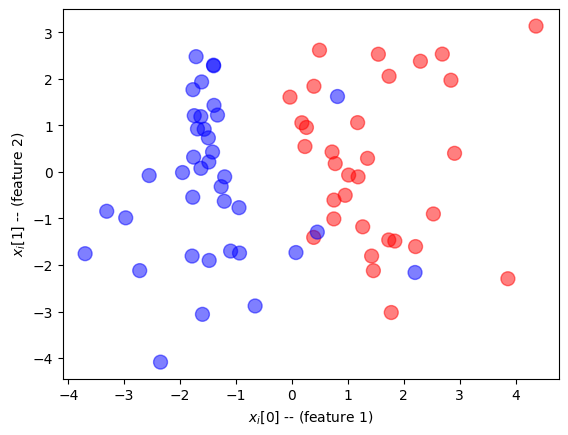

In [6]:
plot_dataset(train_x, train_labels)

In [7]:
# Normalizing Data

# Bring our input features to the standard range of [0,1] (or [-1,1]).
# Because We want to avoid values that flow through our network getting too big or too small,
# and we normally agree to keep all values in the small range close to 0.

train_x_norm = (train_x-np.min(train_x,axis=0)) / (np.max(train_x,axis=0)-np.min(train_x,axis=0))
test_x_norm = (test_x-np.min(train_x,axis=0)) / (np.max(train_x,axis=0)-np.min(train_x,axis=0))

In [8]:
# Training One-Layer Network (Perceptron)

model = keras.models.Sequential()
model.add(keras.Input(shape=(2,)))  # contains the specification of network's input size
model.add(keras.layers.Dense(1))    # actual perceptron that contains trainable weights
model.add(keras.layers.Activation(keras.activations.sigmoid))   # brings the result of the network into 0-1 range (to make it a probability).

# Now the model will take as input arrays of shape (None, 2)
# and output arrays of shape (None, 1).

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Input size, as well as activation function, can also be specified directly in the Dense layer

model = keras.models.Sequential()
model.add(keras.layers.Dense(1,input_shape=(2,),activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.2),loss='binary_crossentropy',metrics=['acc'])     # sgd stands for stochastic gradient descent

In [11]:
model.fit(x=train_x_norm,y=train_labels,validation_data=(test_x_norm,test_labels),epochs=10,batch_size=1)

Epoch 1/10
70/70 [==============================] - 1s 10ms/step - loss: 0.7259 - acc: 0.4571 - val_loss: 0.6579 - val_acc: 0.6333
Epoch 2/10
70/70 [==============================] - 0s 2ms/step - loss: 0.6234 - acc: 0.6286 - val_loss: 0.5881 - val_acc: 0.9000
Epoch 3/10
70/70 [==============================] - 0s 2ms/step - loss: 0.5548 - acc: 0.7857 - val_loss: 0.5307 - val_acc: 0.7333
Epoch 4/10
70/70 [==============================] - 0s 2ms/step - loss: 0.5120 - acc: 0.8857 - val_loss: 0.4842 - val_acc: 0.9667
Epoch 5/10
70/70 [==============================] - 0s 2ms/step - loss: 0.4712 - acc: 0.9000 - val_loss: 0.4624 - val_acc: 0.9000
Epoch 6/10
70/70 [==============================] - 0s 2ms/step - loss: 0.4405 - acc: 0.9143 - val_loss: 0.4603 - val_acc: 0.8000
Epoch 7/10
70/70 [==============================] - 0s 2ms/step - loss: 0.4055 - acc: 0.9000 - val_loss: 0.4274 - val_acc: 0.8333
Epoch 8/10
70/70 [==============================] - 0s 3ms/step - loss: 0.3953 - acc: 0.9

In [12]:
# Setting batch_size to be too large (or not specifying it at all) may result in less stable training,
# because with low-dimensional data small batch sizes provide more precise direction of the gradient for each specific case

model.fit(x=train_x_norm,y=train_labels,validation_data=(test_x_norm,test_labels),epochs=10,batch_size=100)

Epoch 1/10
1/1 [==============================] - 1s 595ms/step - loss: 0.3437 - acc: 0.9429 - val_loss: 0.3675 - val_acc: 0.9000
Epoch 2/10
1/1 [==============================] - 0s 48ms/step - loss: 0.3434 - acc: 0.9429 - val_loss: 0.3670 - val_acc: 0.9000
Epoch 3/10
1/1 [==============================] - 0s 49ms/step - loss: 0.3432 - acc: 0.9429 - val_loss: 0.3664 - val_acc: 0.9000
Epoch 4/10
1/1 [==============================] - 0s 53ms/step - loss: 0.3430 - acc: 0.9429 - val_loss: 0.3659 - val_acc: 0.9000
Epoch 5/10
1/1 [==============================] - 0s 69ms/step - loss: 0.3427 - acc: 0.9429 - val_loss: 0.3654 - val_acc: 0.9000
Epoch 6/10
1/1 [==============================] - 0s 58ms/step - loss: 0.3425 - acc: 0.9429 - val_loss: 0.3649 - val_acc: 0.9000
Epoch 7/10
1/1 [==============================] - 0s 51ms/step - loss: 0.3423 - acc: 0.9429 - val_loss: 0.3645 - val_acc: 0.9000
Epoch 8/10
1/1 [==============================] - 0s 57ms/step - loss: 0.3421 - acc: 0.9429 - va

C:\Users\User\AppData\Local\Temp\ipykernel_9784\770658117.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


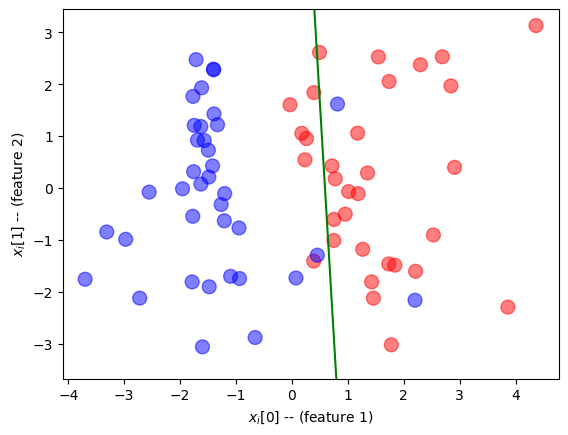

In [13]:
# Plots the line that separates two classes
plot_dataset(train_x,train_labels,W=model.layers[0].weights[0],b=model.layers[0].weights[1])

In [14]:
# Plotting the training graphs

model = keras.models.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid')])

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.05),loss='binary_crossentropy',metrics=['acc'])
hist = model.fit(x=train_x_norm,y=train_labels,validation_data=(test_x_norm,test_labels),epochs=10,batch_size=1)

Epoch 1/10
70/70 [==============================] - 1s 6ms/step - loss: 0.6598 - acc: 0.5286 - val_loss: 0.5947 - val_acc: 0.7333
Epoch 2/10
70/70 [==============================] - 0s 3ms/step - loss: 0.5862 - acc: 0.8714 - val_loss: 0.5820 - val_acc: 0.9333
Epoch 3/10
70/70 [==============================] - 0s 2ms/step - loss: 0.5615 - acc: 0.8714 - val_loss: 0.5835 - val_acc: 0.7667
Epoch 4/10
70/70 [==============================] - 0s 2ms/step - loss: 0.5534 - acc: 0.8714 - val_loss: 0.5599 - val_acc: 0.8667
Epoch 5/10
70/70 [==============================] - 0s 2ms/step - loss: 0.5393 - acc: 0.9143 - val_loss: 0.5453 - val_acc: 0.9000
Epoch 6/10
70/70 [==============================] - 0s 2ms/step - loss: 0.5262 - acc: 0.9429 - val_loss: 0.5376 - val_acc: 0.8667
Epoch 7/10
70/70 [==============================] - 0s 2ms/step - loss: 0.5145 - acc: 0.9429 - val_loss: 0.5261 - val_acc: 0.8667
Epoch 8/10
70/70 [==============================] - 0s 2ms/step - loss: 0.5036 - acc: 0.92

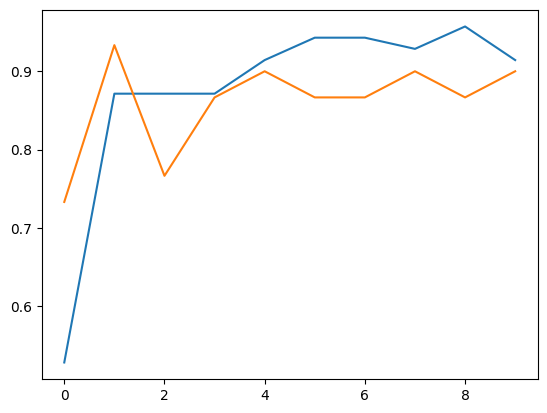

In [15]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

In [16]:
# Multi-Class Classification

model = keras.models.Sequential([
    keras.layers.Dense(5,input_shape=(2,),activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])
model.compile(keras.optimizers.Adam(0.01),'categorical_crossentropy',['acc'])

# Two ways to convert to one-hot encoding
train_labels_onehot = keras.utils.to_categorical(train_labels)
test_labels_onehot = np.eye(2)[test_labels] # 2: Number of rows in the output which is a 2-D array of ones on the diagonal and zeros elsewhere

hist = model.fit(x=train_x_norm,y=train_labels_onehot,
                 validation_data=[test_x_norm,test_labels_onehot],batch_size=1,epochs=10)

Epoch 1/10
70/70 [==============================] - 1s 6ms/step - loss: 0.6517 - acc: 0.6429 - val_loss: 0.6263 - val_acc: 0.9000
Epoch 2/10
70/70 [==============================] - 0s 3ms/step - loss: 0.6088 - acc: 0.8714 - val_loss: 0.6018 - val_acc: 0.7667
Epoch 3/10
70/70 [==============================] - 0s 3ms/step - loss: 0.5565 - acc: 0.9143 - val_loss: 0.5177 - val_acc: 0.9333
Epoch 4/10
70/70 [==============================] - 0s 3ms/step - loss: 0.4992 - acc: 0.8857 - val_loss: 0.4608 - val_acc: 0.9000
Epoch 5/10
70/70 [==============================] - 0s 5ms/step - loss: 0.4278 - acc: 0.9143 - val_loss: 0.3781 - val_acc: 0.9667
Epoch 6/10
70/70 [==============================] - 0s 3ms/step - loss: 0.3767 - acc: 0.9286 - val_loss: 0.3314 - val_acc: 0.9333
Epoch 7/10
70/70 [==============================] - 0s 3ms/step - loss: 0.3420 - acc: 0.9571 - val_loss: 0.2959 - val_acc: 0.9333
Epoch 8/10
70/70 [==============================] - 0s 2ms/step - loss: 0.3145 - acc: 0.95

In [17]:
# Sparse Categorical Cross-Entropy
# expects class number to be integers, and not one-hot vectors

model.compile(keras.optimizers.Adam(0.01),'sparse_categorical_crossentropy',['acc'])
model.fit(x=train_x_norm,y=train_labels,validation_data=[test_x_norm,test_labels],batch_size=1,epochs=10)

Epoch 1/10
70/70 [==============================] - 1s 6ms/step - loss: 0.2578 - acc: 0.9429 - val_loss: 0.2264 - val_acc: 0.9333
Epoch 2/10
70/70 [==============================] - 0s 3ms/step - loss: 0.2609 - acc: 0.9143 - val_loss: 0.2438 - val_acc: 0.9000
Epoch 3/10
70/70 [==============================] - 0s 2ms/step - loss: 0.2539 - acc: 0.9286 - val_loss: 0.2533 - val_acc: 0.9000
Epoch 4/10
70/70 [==============================] - 0s 3ms/step - loss: 0.2394 - acc: 0.9286 - val_loss: 0.2714 - val_acc: 0.9000
Epoch 5/10
70/70 [==============================] - 0s 2ms/step - loss: 0.2297 - acc: 0.9286 - val_loss: 0.2010 - val_acc: 0.9000
Epoch 6/10
70/70 [==============================] - 0s 4ms/step - loss: 0.2371 - acc: 0.9286 - val_loss: 0.1986 - val_acc: 0.9000
Epoch 7/10
70/70 [==============================] - 0s 4ms/step - loss: 0.2413 - acc: 0.9286 - val_loss: 0.2491 - val_acc: 0.9000
Epoch 8/10
70/70 [==============================] - 0s 4ms/step - loss: 0.2373 - acc: 0.94

In [18]:
# Uses Keras to train a classifier for MNIST handwritten digits

import gzip
import pickle
import sys

with gzip.open('mnist.pkl.gz', 'rb') as mnist_pickle:   
    # If the Python version is greater than 2, it uses the encoding='latin1' parameter when calling pickle.load()
    # In Python 3.x, the pickle module expects Unicode strings by default, and the 'latin1' encoding ensures that the binary data is loaded correctly.                              
    if sys.version_info.major > 2:
        MNIST = pickle.load(mnist_pickle, encoding='latin1')
    # If the Python version is 2.x or lower, the code falls back to the regular pickle.load() without specifying the encoding parameter.     
    else:          
        MNIST = pickle.load(mnist_pickle)


In [51]:
from sklearn.model_selection import train_test_split

labels = MNIST[0][1]    # MNIST['Train']['Labels']
features = MNIST[0][0]  # MNIST['Train']['Features']

features_train, features_test, labels_train, labels_test = train_test_split(features,labels,test_size=0.2, shuffle=True)


In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(392,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(keras.optimizers.Adam(0.01),'sparse_categorical_crossentropy',['acc'])
model.fit(x=features_train,y=labels_train,validation_data=[features_test,labels_test],batch_size=392,epochs=10)

Epoch 1/10
103/103 [==============================] - 3s 20ms/step - loss: 0.2951 - acc: 0.9077 - val_loss: 0.1639 - val_acc: 0.9496
Epoch 2/10
103/103 [==============================] - 2s 19ms/step - loss: 0.1070 - acc: 0.9666 - val_loss: 0.1276 - val_acc: 0.9612
Epoch 3/10
103/103 [==============================] - 2s 18ms/step - loss: 0.0662 - acc: 0.9795 - val_loss: 0.0995 - val_acc: 0.9707
Epoch 4/10
103/103 [==============================] - 2s 20ms/step - loss: 0.0498 - acc: 0.9837 - val_loss: 0.1188 - val_acc: 0.9673
Epoch 5/10
103/103 [==============================] - 2s 18ms/step - loss: 0.0412 - acc: 0.9862 - val_loss: 0.0954 - val_acc: 0.9738
Epoch 6/10
103/103 [==============================] - 2s 19ms/step - loss: 0.0341 - acc: 0.9886 - val_loss: 0.0920 - val_acc: 0.9768
Epoch 7/10
103/103 [==============================] - 2s 18ms/step - loss: 0.0436 - acc: 0.9859 - val_loss: 0.1278 - val_acc: 0.9703
Epoch 8/10
103/103 [==============================] - 2s 20ms/step - 